In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [4]:
x, y = make_blobs(random_state=1)

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [8]:
print(kmeans.labels_) # 아래랑 똑같은 것이다.

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [9]:
print(kmeans.predict(x))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


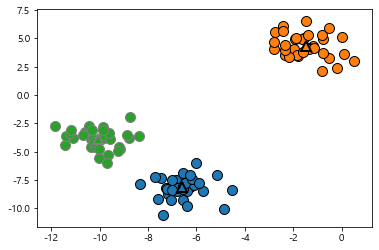

In [12]:
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], 
                         kmeans.cluster_centers_[:,1], [0,1,2],
                        markers='^', markeredgewidth=2)
plt.show()

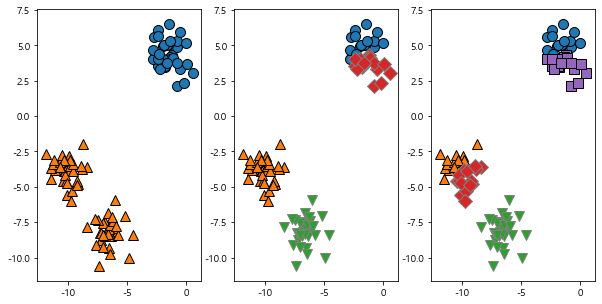

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# k가 2개
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(x)
assignments2 = kmeans2.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], assignments2, ax=axes[0])

# k가 4개
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(x)
assignments4 = kmeans4.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], assignments4, ax=axes[1])

# k가 5개
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(x)
assignments5 = kmeans5.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], assignments5, ax=axes[2])

### k-means 실패사례

In [19]:
x, y = make_blobs(n_samples=200, cluster_std=[1.0, 2.5,0.5],
                 random_state=170)

In [21]:
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(x) # 예측값 설정

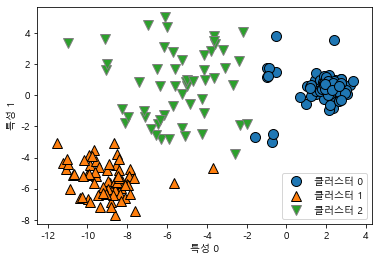

In [22]:
mglearn.discrete_scatter(x[:,0], x[:,1], y_pred)
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

In [25]:
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2,2))
x = np.dot(x, transformation)

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_pred = kmeans.predict(x)

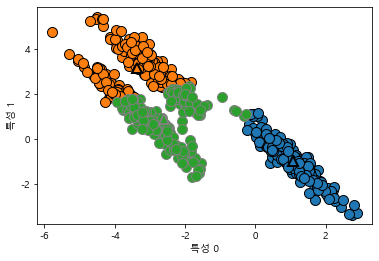

In [28]:
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], 
                         kmeans.cluster_centers_[:,1], 
                         [0,1,2], markers='^', markeredgewidth=2)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

In [30]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 클러스터 2개를 가지는 kmeans
# 학습,예측(y_pred)

In [32]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_pred = kmeans.predict(x)

Text(0, 0.5, '특성 1')

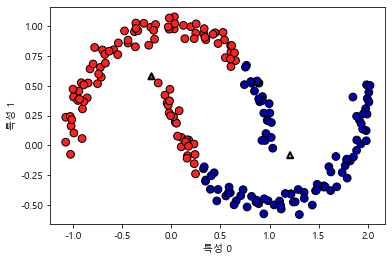

In [35]:
plt.scatter(x[:,0], x[:,1], c=y_pred, cmap = mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           marker='^', c=range(kmeans.n_clusters), linewidths=2, cmap='Paired',
           edgecolors='k')
plt.xlabel('특성 0')
plt.ylabel('특성 1')